In [1]:
#Load packages
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
#import dandelion as ddl
import tables
from rpy2.robjects import r

In [2]:
from collections import defaultdict

In [3]:
#Create dictionaries
adata_tmp = defaultdict(dict)
adata_tmp2 = defaultdict(dict)

In [4]:
#Change directory
os.chdir("/Users/matthewcoates/Documents/Cambridge/R files/")


In [5]:
#Read in cellbender only metadata
sampleList = pd.read_csv('/Users/matthewcoates/Documents/Cambridge/COVID_NASAL_test_meta_cellbender.csv')
sampleList

,study_id/patient_id,sampleid,site,cohort,Sub-cohort,batch,Nasal inflammation,COVID Severity,age,cohort.1,Gender,sangerid_GEX,sangerid_BCR,sangerid_TCR
0,N01-001,Sample_Fq21,Nasal,Control,GPA control,2,yes,NaN,middle,COMBIVAS,M,NaN,NaN,NaN
1,N01-002,Sample_Fq2,Nasal,Control,GPA control,1,yes,NaN,middle,COMBIVAS,F,NaN,NaN,NaN
2,N01-005,Sample_Fq27,Nasal,Control,GPA control,2,yes,NaN,old,COMBIVAS,M,NaN,NaN,NaN
3,N01-011,Sample_Fq61,Nasal,Control,GPA control,4,yes,NaN,middle,COMBIVAS,M,NaN,NaN,NaN
4,N01-001,Sample_Fq20,Blood,Control,GPA control,2,yes,NaN,middle,COMBIVAS,M,NaN,NaN,NaN
5,N01-002,Sample_Fq1,Blood,Control,GPA control,1,yes,NaN,middle,COMBIVAS,F,NaN,NaN,NaN
6,N01-005,Sample_Fq26,Blood,Control,GPA control,2,yes,NaN,old,COMBIVAS,M,NaN,NaN,NaN
7,N01-011,Sample_Fq60,Blood,Control,GPA control,4,yes,NaN,middle,COMBIVAS,M,NaN,NaN,NaN
8,1,Sample_Fq1_COV,Blood,COVID,Active COV,c1,severe,severe,Old,COVID,M,NaN,NaN,NaN
9,1,Sample_Fq2_COV,Nasal,COVID,Active COV,c1,severe,severe,Old,COVID,M,NaN,NaN,NaN


In [6]:
#Create list of just sampleIDs
sampleList.sampleid

0        Sample_Fq21
1         Sample_Fq2
2        Sample_Fq27
3        Sample_Fq61
4        Sample_Fq20
5         Sample_Fq1
6        Sample_Fq26
7        Sample_Fq60
8     Sample_Fq1_COV
9     Sample_Fq2_COV
10    Sample_Fq3_COV
11    Sample_Fq4_COV
12    Sample_Fq5_COV
13    Sample_Fq6_COV
14       Sample_Fq_4
15       Sample_Fq_5
16      Sample_Fq_10
17      Sample_Fq_11
18      Sample_Fq_14
19      Sample_Fq_15
20      Sample_Fq_18
21      Sample_Fq_19
22      Sample_Fq_38
23         MC9785359
24         MC9785360
25         MC9785361
26         MC9785362
27         MC9785363
28         MC9785364
29         MC9785365
30         MC9785366
31         MC9785367
32         MC9785368
33         MC9785369
34         MC9785370
35         MC9785371
36         MC9785372
37         MC9785373
38         MC9785374
39         MC9785407
Name: sampleid, dtype: object

In [7]:
#Create list of just sampleIds
samplelist = sampleList['sampleid'].tolist()
samplelist

['Sample_Fq21',
 'Sample_Fq2',
 'Sample_Fq27',
 'Sample_Fq61',
 'Sample_Fq20',
 'Sample_Fq1',
 'Sample_Fq26',
 'Sample_Fq60',
 'Sample_Fq1_COV',
 'Sample_Fq2_COV',
 'Sample_Fq3_COV',
 'Sample_Fq4_COV',
 'Sample_Fq5_COV',
 'Sample_Fq6_COV',
 'Sample_Fq_4',
 'Sample_Fq_5',
 'Sample_Fq_10',
 'Sample_Fq_11',
 'Sample_Fq_14',
 'Sample_Fq_15',
 'Sample_Fq_18',
 'Sample_Fq_19',
 'Sample_Fq_38',
 'MC9785359',
 'MC9785360',
 'MC9785361',
 'MC9785362',
 'MC9785363',
 'MC9785364',
 'MC9785365',
 'MC9785366',
 'MC9785367',
 'MC9785368',
 'MC9785369',
 'MC9785370',
 'MC9785371',
 'MC9785372',
 'MC9785373',
 'MC9785374',
 'MC9785407']

In [8]:
#Ben's code for processing cellbender output data
"""Functions for downstream work with outputs of remove-background."""

import tables
import numpy as np
import scipy.sparse as sp
from typing import Dict


def dict_from_h5(file: str) -> Dict[str, np.ndarray]:
    """Read in everything from an h5 file and put into a dictionary."""
    d = {}
    with tables.open_file(file) as f:
        # read in everything
        for array in f.walk_nodes("/", "Array"):
            d[array.name] = array.read()
    return d


def anndata_from_h5(file: str,
                    analyzed_barcodes_only: bool = True) -> 'anndata.AnnData':
    """Load an output h5 file into an AnnData object for downstream work.

    Args:
        file: The h5 file
        analyzed_barcodes_only: False to load all barcodes, so that the size of
            the AnnData object will match the size of the input raw count matrix.
            True to load a limited set of barcodes: only those analyzed by the
            algorithm. This allows relevant latent variables to be loaded
            properly into adata.obs and adata.obsm, rather than adata.uns.

    Returns:
        adata: The anndata object, populated with inferred latent variables
            and metadata.

    """

    try:
        import anndata
    except ImportError:
        raise ImportError('The anndata package must be installed to use the '
                          'function anndata_from_h5()')

    d = dict_from_h5(file)
    X = sp.csc_matrix((d.pop('data'), d.pop('indices'), d.pop('indptr')),
                      shape=d.pop('shape')).transpose().tocsr()

    if analyzed_barcodes_only:
        if 'barcodes_analyzed_inds' in d.keys():
            X = X[d['barcodes_analyzed_inds'], :]
            d['barcodes'] = d['barcodes'][d['barcodes_analyzed_inds']]
        elif 'barcode_indices_for_latents' in d.keys():
            X = X[d['barcode_indices_for_latents'], :]
            d['barcodes'] = d['barcodes'][d['barcode_indices_for_latents']]
        else:
            print('Warning: analyzed_barcodes_only=True, but the key '
                  '"barcodes_analyzed_inds" or "barcode_indices_for_latents" '
                  'is missing from the h5 file. '
                  'Will output all barcodes, and proceed as if '
                  'analyzed_barcodes_only=False')

    # Construct the count matrix.
    adata = anndata.AnnData(X=X,
                            obs={'barcode': d.pop('barcodes').astype(str)},
                            var={'gene_name': (d.pop('gene_names') if 'gene_names' in d.keys()
                                               else d.pop('name')).astype(str)})
    adata.obs.set_index('barcode', inplace=True)
    adata.var.set_index('gene_name', inplace=True)

    # Add other information to the adata object in the appropriate slot.
    for key, value in d.items():
        try:
            value = np.asarray(value)
            if len(value.shape) == 0:
                adata.uns[key] = value
            elif value.shape[0] == X.shape[0]:
                if (len(value.shape) < 2) or (value.shape[1] < 2):
                    adata.obs[key] = value
                else:
                    adata.obsm[key] = value
            elif value.shape[0] == X.shape[1]:
                if value.dtype.name.startswith('bytes'):
                    adata.var[key] = value.astype(str)
                else:
                    adata.var[key] = value
            else:
                adata.uns[key] = value
        except Exception:
            print('Unable to load data into AnnData: ', key, value, type(value))

    if analyzed_barcodes_only:
        for col in adata.obs.columns[adata.obs.columns.str.startswith('barcodes_analyzed')
                                     | adata.obs.columns.str.startswith('barcode_indices')]:
            try:
                del adata.obs[col]
            except Exception:
                pass

    return adata


def load_anndata_from_input_and_output(input_file: str,
                                       output_file: str,
                                       analyzed_barcodes_only: bool = True,
                                       input_layer_key: str = 'cellranger') -> 'anndata.AnnData':
    """Load remove-background output count matrix into an anndata object,
    together with remove-background metadata and the raw input counts.

    Args:
        input_file: Raw h5 file used as input for remove-background.
        output_file: Output h5 file created by remove-background (can be
            filtered or not).
        analyzed_barcodes_only: Argument passed to anndata_from_h5().
            False to load all barcodes, so that the size of
            the AnnData object will match the size of the input raw count matrix.
            True to load a limited set of barcodes: only those analyzed by the
            algorithm. This allows relevant latent variables to be loaded
            properly into adata.obs and adata.obsm, rather than adata.uns.
        input_layer_key: Key of the anndata.layer that is created for the raw
            input count matrix.

    Return:
        adata_out: AnnData object with counts before and after remove-background,
            as well as inferred latent variables from remove-background.

    """

    # Load input data.
    adata_raw = anndata_from_h5(input_file, analyzed_barcodes_only=False)

    # Load remove-background output data.
    adata_out = anndata_from_h5(output_file, analyzed_barcodes_only=analyzed_barcodes_only)

    # Subset the raw dataset to the relevant barcodes.
    adata_raw = adata_raw[adata_out.obs.index]

    # Put count matrices into 'layers' in anndata for clarity.
    adata_out.layers[input_layer_key] = adata_raw.X.copy()
    adata_out.layers['cellbender'] = adata_out.X.copy()

    # Pre-compute a bit of metadata.
    adata_out.var['n_cellranger'] = np.array(adata_out.layers['cellranger'].sum(axis=0)).squeeze()
    adata_out.var['n_cellbender'] = np.array(adata_out.layers['cellbender'].sum(axis=0)).squeeze()

    return adata_out



In [11]:
#Not used
#adata_cellbender = defaultdict(dict)

In [13]:
#Not used
#adata_cellbender = load_anndata_from_input_and_output(input_file = ("COVID_combined_trans/Sample_Fq21/raw_feature_bc_matrix.h5"),
                                       #output_file = ("COVID_combined_trans/Sample_Fq21/cellbender_out/output.h5"))
#adata_cellbender
#Note: adata.obsm['latent_gene_encoding'] is the same as z / adata.obsm['X_cellbender'] from the cellbender vignette

In [10]:
#Create blank dictionaries for cellbender file paths
input_cfile = defaultdict(dict)
output_cfile = defaultdict(dict)
input_newfile = defaultdict(dict)

In [11]:
input_cfile

defaultdict(dict, {})

In [12]:
#Read in cellbender file paths
for x in sampleList.sampleid:
    input_cfile[x] = ("COVID_IRVAS_combined_trans/" +x+ "/raw_feature_bc_matrix.h5")
    output_cfile[x] = ("COVID_IRVAS_combined_trans/" +x+ "/cellbender_out/output.h5")
    input_newfile[x] = ("COVID_IRVAS_combined_trans/" +x+ "/cellbender_out/output_filtered.h5")
input_newfile["Sample_Fq21"]

'COVID_IRVAS_combined_trans/Sample_Fq21/cellbender_out/output_filtered.h5'

In [13]:
#Create blank dictionary to read in cellbender data
adata_cellbender = defaultdict(dict)

In [14]:
#Load in cellbender data
for x in samplelist:
    adata_cellbender[x] = load_anndata_from_input_and_output(input_file = input_cfile[x], output_file = output_cfile[x])
adata_cellbender

defaultdict(dict,
            {'Sample_Fq21': AnnData object with n_obs × n_vars = 55034 × 33538
                 obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale'
                 var: 'ambient_expression', 'feature_type', 'genome', 'id', 'n_cellranger', 'n_cellbender'
                 uns: 'contamination_fraction_params', 'fraction_data_used_for_testing', 'lambda_multiplier', 'overdispersion_mean_and_scale', 'target_false_positive_rate', 'test_elbo', 'test_epoch', 'training_elbo_per_epoch'
                 obsm: 'latent_gene_encoding'
                 layers: 'cellranger', 'cellbender',
             'Sample_Fq2': AnnData object with n_obs × n_vars = 75155 × 33547
                 obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale'
                 var: 'ambient_expression', 'feature_type', 'genome', 'id', 'n_cellranger', 'n_cellbender'
                 uns: 'contamination_fraction_params', 'fraction_data_used_for_testing', 'lambda_multiplier', 

In [15]:
#Check data
adata_cellbender['Sample_Fq21']

AnnData object with n_obs × n_vars = 55034 × 33538
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale'
    var: 'ambient_expression', 'feature_type', 'genome', 'id', 'n_cellranger', 'n_cellbender'
    uns: 'contamination_fraction_params', 'fraction_data_used_for_testing', 'lambda_multiplier', 'overdispersion_mean_and_scale', 'target_false_positive_rate', 'test_elbo', 'test_epoch', 'training_elbo_per_epoch'
    obsm: 'latent_gene_encoding'
    layers: 'cellranger', 'cellbender'

In [16]:
#Check data
adata_cellbender['Sample_Fq_18'].var

,ambient_expression,feature_type,genome,id,n_cellranger,n_cellbender
gene_name,,,,,,
MIR1302-2HG,0.000000e+00,Gene Expression,GRCh38,ENSG00000243485,0.0,0.0
FAM138A,0.000000e+00,Gene Expression,GRCh38,ENSG00000237613,0.0,0.0
OR4F5,0.000000e+00,Gene Expression,GRCh38,ENSG00000186092,0.0,0.0
AL627309.1,4.315671e-14,Gene Expression,GRCh38,ENSG00000238009,5.0,5.0
AL627309.3,0.000000e+00,Gene Expression,GRCh38,ENSG00000239945,0.0,0.0
...,...,...,...,...,...,...
PD1_prot,4.000363e-02,Antibody Capture,,PD1_prot,82875.0,2922.0
CD38_prot,2.550488e-02,Antibody Capture,,CD38_prot,53155.0,1029.0
CD27_prot,2.840090e-02,Antibody Capture,,CD27_prot,60202.0,1723.0


In [17]:
#Scrublet processing of cellbender data
for x in samplelist:
    sc.external.pp.scrublet(adata_cellbender[x], expected_doublet_rate = 0.06)
adata_cellbender[x]

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.70
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 2.9%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 1.3%


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Automatically set threshold at doublet score = 0.19
Detected doublet rate = 7.3%
Estimated detectable doublet fraction = 50.8%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 14.3%


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.58
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 11.5%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 4.3%


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.71
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.2%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.0%


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.70
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 2.5%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 2.4%


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Automatically set threshold at doublet score = 0.71
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.0%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 0.0%


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.70
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 4.8%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 2.0%


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.68
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 5.9%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 2.6%


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.52
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 3.0%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.4%


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.56
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 5.6%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.0%


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.49
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 27.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 1.3%


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.46
Detected doublet rate = 0.7%
Estimated detectable doublet fraction = 31.2%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 2.2%


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.74
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 0.0%


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.73
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 4.1%


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.68
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.6%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 1.5%


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.62
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.2%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 25.0%


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.67
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 1.9%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 0.0%


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.69
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 1.0%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 5.7%


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.67
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 2.6%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 4.4%


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.67
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 8.7%


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Automatically set threshold at doublet score = 0.67
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.9%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.4%


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Automatically set threshold at doublet score = 0.70
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.0%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 0.0%


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.74
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 6.5%


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.39
Detected doublet rate = 0.6%
Estimated detectable doublet fraction = 26.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 2.4%


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.67
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 1.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 2.4%


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.47
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 24.7%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 0.6%


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.69
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 8.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 2.5%


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.71
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 2.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 2.9%


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.72
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.8%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.0%


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.66
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 0.7%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 8.7%


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.37
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 17.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.0%


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.68
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 2.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 2.5%


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.73
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 1.2%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 2.4%


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.67
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 7.4%


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.75
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 1.1%


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.41
Detected doublet rate = 0.7%
Estimated detectable doublet fraction = 23.9%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 2.7%


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.48
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 17.2%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 1.9%


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.66
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 1.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 4.1%


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.72
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.8%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 4.6%


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/matthewcoates/opt/anaconda3/envs/naspython/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.77
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 3.6%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 0.0%


AnnData object with n_obs × n_vars = 62711 × 33538
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'doublet_score', 'predicted_doublet'
    var: 'ambient_expression', 'feature_type', 'genome', 'id', 'n_cellranger', 'n_cellbender'
    uns: 'contamination_fraction_params', 'fraction_data_used_for_testing', 'lambda_multiplier', 'overdispersion_mean_and_scale', 'target_false_positive_rate', 'test_elbo', 'test_epoch', 'training_elbo_per_epoch', 'scrublet'
    obsm: 'latent_gene_encoding'
    layers: 'cellranger', 'cellbender'

In [18]:
#Check data
adata_cellbender

defaultdict(dict,
            {'Sample_Fq21': AnnData object with n_obs × n_vars = 55034 × 33538
                 obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'doublet_score', 'predicted_doublet'
                 var: 'ambient_expression', 'feature_type', 'genome', 'id', 'n_cellranger', 'n_cellbender'
                 uns: 'contamination_fraction_params', 'fraction_data_used_for_testing', 'lambda_multiplier', 'overdispersion_mean_and_scale', 'target_false_positive_rate', 'test_elbo', 'test_epoch', 'training_elbo_per_epoch', 'scrublet'
                 obsm: 'latent_gene_encoding'
                 layers: 'cellranger', 'cellbender',
             'Sample_Fq2': AnnData object with n_obs × n_vars = 75155 × 33547
                 obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'doublet_score', 'predicted_doublet'
                 var: 'ambient_expression', 'feature_type', 'genome', 'id', 'n_cellranger', 'n_cellbender'
                 uns: 

In [19]:
#Make data name shorter and easier
adata = adata_cellbender
adata

defaultdict(dict,
            {'Sample_Fq21': AnnData object with n_obs × n_vars = 55034 × 33538
                 obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'doublet_score', 'predicted_doublet'
                 var: 'ambient_expression', 'feature_type', 'genome', 'id', 'n_cellranger', 'n_cellbender'
                 uns: 'contamination_fraction_params', 'fraction_data_used_for_testing', 'lambda_multiplier', 'overdispersion_mean_and_scale', 'target_false_positive_rate', 'test_elbo', 'test_epoch', 'training_elbo_per_epoch', 'scrublet'
                 obsm: 'latent_gene_encoding'
                 layers: 'cellranger', 'cellbender',
             'Sample_Fq2': AnnData object with n_obs × n_vars = 75155 × 33547
                 obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'doublet_score', 'predicted_doublet'
                 var: 'ambient_expression', 'feature_type', 'genome', 'id', 'n_cellranger', 'n_cellbender'
                 uns: 

In [20]:
#Check data
adata['Sample_Fq21'].obs

,latent_RT_efficiency,latent_cell_probability,latent_scale,doublet_score,predicted_doublet
barcode,,,,,
CTCGAAATCGCGCCAA-1,6.181508,1.000000,2019.549927,0.053007,False
GGCGACTGTTAAAGTG-1,6.022950,1.000000,1802.872681,0.056805,False
GCGCGATGTGCACCAC-1,6.647709,1.000000,1822.003296,0.068795,False
CAGCATACAGTGAGTG-1,5.782654,1.000000,1711.177734,0.078062,False
GCCTCTAAGGTGATAT-1,6.474101,1.000000,1975.588501,0.051811,False
...,...,...,...,...,...
GTTCGGGTCCTTTACA-1,0.471652,0.003728,809.997437,NaN,NaN
CGGACGTCATCAGTCA-1,0.202732,0.004921,479.249176,NaN,NaN
ACACCGGTCAGTTAGC-1,0.261303,0.002247,502.411255,NaN,NaN


In [21]:
#Check data
adata['Sample_Fq_18'].var

,ambient_expression,feature_type,genome,id,n_cellranger,n_cellbender
gene_name,,,,,,
MIR1302-2HG,0.000000e+00,Gene Expression,GRCh38,ENSG00000243485,0.0,0.0
FAM138A,0.000000e+00,Gene Expression,GRCh38,ENSG00000237613,0.0,0.0
OR4F5,0.000000e+00,Gene Expression,GRCh38,ENSG00000186092,0.0,0.0
AL627309.1,4.315671e-14,Gene Expression,GRCh38,ENSG00000238009,5.0,5.0
AL627309.3,0.000000e+00,Gene Expression,GRCh38,ENSG00000239945,0.0,0.0
...,...,...,...,...,...,...
PD1_prot,4.000363e-02,Antibody Capture,,PD1_prot,82875.0,2922.0
CD38_prot,2.550488e-02,Antibody Capture,,CD38_prot,53155.0,1029.0
CD27_prot,2.840090e-02,Antibody Capture,,CD27_prot,60202.0,1723.0


In [24]:
#Change name of meta to sampleInfo
sampleInfo = sampleList
sampleInfo

,study_id/patient_id,sampleid,site,cohort,Sub-cohort,batch,Nasal inflammation,COVID Severity,age,cohort.1,Gender,sangerid_GEX,sangerid_BCR,sangerid_TCR
0,N01-001,Sample_Fq21,Nasal,Control,GPA control,2,yes,NaN,middle,COMBIVAS,M,NaN,NaN,NaN
1,N01-002,Sample_Fq2,Nasal,Control,GPA control,1,yes,NaN,middle,COMBIVAS,F,NaN,NaN,NaN
2,N01-005,Sample_Fq27,Nasal,Control,GPA control,2,yes,NaN,old,COMBIVAS,M,NaN,NaN,NaN
3,N01-011,Sample_Fq61,Nasal,Control,GPA control,4,yes,NaN,middle,COMBIVAS,M,NaN,NaN,NaN
4,N01-001,Sample_Fq20,Blood,Control,GPA control,2,yes,NaN,middle,COMBIVAS,M,NaN,NaN,NaN
5,N01-002,Sample_Fq1,Blood,Control,GPA control,1,yes,NaN,middle,COMBIVAS,F,NaN,NaN,NaN
6,N01-005,Sample_Fq26,Blood,Control,GPA control,2,yes,NaN,old,COMBIVAS,M,NaN,NaN,NaN
7,N01-011,Sample_Fq60,Blood,Control,GPA control,4,yes,NaN,middle,COMBIVAS,M,NaN,NaN,NaN
8,1,Sample_Fq1_COV,Blood,COVID,Active COV,c1,severe,severe,Old,COVID,M,NaN,NaN,NaN
9,1,Sample_Fq2_COV,Nasal,COVID,Active COV,c1,severe,severe,Old,COVID,M,NaN,NaN,NaN


In [25]:
#Add in metadata
for i in sampleInfo.index:
    adata[sampleInfo['sampleid'].at[i]].obs['Sampleid'] = sampleInfo['sampleid'].at[i] 
    adata[sampleInfo['sampleid'].at[i]].obs['Patient'] = sampleInfo['study_id/patient_id'].at[i]    
    adata[sampleInfo['sampleid'].at[i]].obs['Sampletype'] = sampleInfo['site'].at[i]
    adata[sampleInfo['sampleid'].at[i]].obs['Age_group'] = sampleInfo['age'].at[i]
    adata[sampleInfo['sampleid'].at[i]].obs['Gender'] = sampleInfo['Gender'].at[i]
    adata[sampleInfo['sampleid'].at[i]].obs['Cohort'] = sampleInfo['cohort'].at[i]
    adata[sampleInfo['sampleid'].at[i]].obs['Diseasetype'] = sampleInfo['Sub-cohort'].at[i]
    adata[sampleInfo['sampleid'].at[i]].obs['Batch'] = sampleInfo['batch'].at[i]
    adata[sampleInfo['sampleid'].at[i]].obs['Study'] = sampleInfo['cohort.1'].at[i]
    adata[sampleInfo['sampleid'].at[i]].obs['Nasal_inflammation'] = sampleInfo['Nasal inflammation'].at[i]
    adata[sampleInfo['sampleid'].at[i]].obs['COVID_severity'] = sampleInfo['COVID Severity'].at[i]
adata

defaultdict(dict,
            {'Sample_Fq21': AnnData object with n_obs × n_vars = 55034 × 33538
                 obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'doublet_score', 'predicted_doublet', 'Sampleid', 'Patient', 'Sampletype', 'Age_group', 'Gender', 'Cohort', 'Diseasetype', 'Batch', 'Study', 'Nasal_inflammation', 'COVID_severity'
                 var: 'ambient_expression', 'feature_type', 'genome', 'id', 'n_cellranger', 'n_cellbender'
                 uns: 'contamination_fraction_params', 'fraction_data_used_for_testing', 'lambda_multiplier', 'overdispersion_mean_and_scale', 'target_false_positive_rate', 'test_elbo', 'test_epoch', 'training_elbo_per_epoch', 'scrublet'
                 obsm: 'latent_gene_encoding'
                 layers: 'cellranger', 'cellbender',
             'Sample_Fq2': AnnData object with n_obs × n_vars = 75155 × 33547
                 obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'doublet_score', 'predi

In [26]:
#Check 
adata

defaultdict(dict,
            {'Sample_Fq21': AnnData object with n_obs × n_vars = 55034 × 33538
                 obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'doublet_score', 'predicted_doublet', 'Sampleid', 'Patient', 'Sampletype', 'Age_group', 'Gender', 'Cohort', 'Diseasetype', 'Batch', 'Study', 'Nasal_inflammation', 'COVID_severity'
                 var: 'ambient_expression', 'feature_type', 'genome', 'id', 'n_cellranger', 'n_cellbender'
                 uns: 'contamination_fraction_params', 'fraction_data_used_for_testing', 'lambda_multiplier', 'overdispersion_mean_and_scale', 'target_false_positive_rate', 'test_elbo', 'test_epoch', 'training_elbo_per_epoch', 'scrublet'
                 obsm: 'latent_gene_encoding'
                 layers: 'cellranger', 'cellbender',
             'Sample_Fq2': AnnData object with n_obs × n_vars = 75155 × 33547
                 obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'doublet_score', 'predi

In [31]:
#Check 
adata['Sample_Fq_18'].var

,ambient_expression,feature_type,genome,id,n_cellranger,n_cellbender
gene_name,,,,,,
MIR1302-2HG,0.000000e+00,Gene Expression,GRCh38,ENSG00000243485,0.0,0.0
FAM138A,0.000000e+00,Gene Expression,GRCh38,ENSG00000237613,0.0,0.0
OR4F5,0.000000e+00,Gene Expression,GRCh38,ENSG00000186092,0.0,0.0
AL627309.1,4.166244e-13,Gene Expression,GRCh38,ENSG00000238009,3.0,1.0
AL627309.3,0.000000e+00,Gene Expression,GRCh38,ENSG00000239945,0.0,0.0
...,...,...,...,...,...,...
AC233755.2,9.645281e-06,Gene Expression,GRCh38,ENSG00000277856,496.0,486.0
AC233755.1,1.563099e-04,Gene Expression,GRCh38,ENSG00000275063,1926.0,1698.0
AC240274.1,3.124600e-06,Gene Expression,GRCh38,ENSG00000271254,16.0,14.0


In [32]:
#Remove these columns which were causing issues at concatenation step. 
for x in samplelist:
    del adata[x].var['n_cellranger']
    del adata[x].var['n_cellbender']
    del adata[x].var['ambient_expression']
    
adata

defaultdict(dict,
            {'Sample_Fq21': AnnData object with n_obs × n_vars = 55034 × 33538
                 obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'doublet_score', 'predicted_doublet', 'Sampleid', 'Patient', 'Sampletype', 'Age_group', 'Gender', 'Cohort', 'Diseasetype', 'Batch', 'Study', 'Nasal_inflammation', 'COVID_severity'
                 var: 'feature_type', 'genome', 'id'
                 uns: 'contamination_fraction_params', 'fraction_data_used_for_testing', 'lambda_multiplier', 'overdispersion_mean_and_scale', 'target_false_positive_rate', 'test_elbo', 'test_epoch', 'training_elbo_per_epoch', 'scrublet'
                 obsm: 'latent_gene_encoding'
                 layers: 'cellranger', 'cellbender',
             'Sample_Fq2': AnnData object with n_obs × n_vars = 75155 × 33547
                 obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'doublet_score', 'predicted_doublet', 'Sampleid', 'Patient', 'Sampletype', 'A

In [34]:
#Make obs unique
for x in samplelist:
    adata[x].obs_names_make_unique()
adata

defaultdict(dict,
            {'Sample_Fq21': AnnData object with n_obs × n_vars = 55034 × 33538
                 obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'doublet_score', 'predicted_doublet', 'Sampleid', 'Patient', 'Sampletype', 'Age_group', 'Gender', 'Cohort', 'Diseasetype', 'Batch', 'Study', 'Nasal_inflammation', 'COVID_severity'
                 var: 'ambient_expression', 'feature_type', 'genome', 'id', 'n_cellranger', 'n_cellbender'
                 uns: 'contamination_fraction_params', 'fraction_data_used_for_testing', 'lambda_multiplier', 'overdispersion_mean_and_scale', 'target_false_positive_rate', 'test_elbo', 'test_epoch', 'training_elbo_per_epoch', 'scrublet'
                 obsm: 'latent_gene_encoding'
                 layers: 'cellranger', 'cellbender',
             'Sample_Fq2': AnnData object with n_obs × n_vars = 75155 × 33547
                 obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'doublet_score', 'predi

In [36]:
#Make var unique
for x in samplelist:
    adata[x].var_names_make_unique()
adata

defaultdict(dict,
            {'Sample_Fq21': AnnData object with n_obs × n_vars = 55034 × 33538
                 obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'doublet_score', 'predicted_doublet', 'Sampleid', 'Patient', 'Sampletype', 'Age_group', 'Gender', 'Cohort', 'Diseasetype', 'Batch', 'Study', 'Nasal_inflammation', 'COVID_severity'
                 var: 'feature_type', 'genome', 'id'
                 uns: 'contamination_fraction_params', 'fraction_data_used_for_testing', 'lambda_multiplier', 'overdispersion_mean_and_scale', 'target_false_positive_rate', 'test_elbo', 'test_epoch', 'training_elbo_per_epoch', 'scrublet'
                 obsm: 'latent_gene_encoding'
                 layers: 'cellranger', 'cellbender',
             'Sample_Fq2': AnnData object with n_obs × n_vars = 75155 × 33547
                 obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'doublet_score', 'predicted_doublet', 'Sampleid', 'Patient', 'Sampletype', 'A

In [37]:
#Create blank object for data in preparation for concatenation
adata_list = []
adata_list

[]

In [38]:
#Add data to object
for x in samplelist:
    adata_list.append(adata[x], )
adata_list

[AnnData object with n_obs × n_vars = 55034 × 33538
     obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'doublet_score', 'predicted_doublet', 'Sampleid', 'Patient', 'Sampletype', 'Age_group', 'Gender', 'Cohort', 'Diseasetype', 'Batch', 'Study', 'Nasal_inflammation', 'COVID_severity'
     var: 'feature_type', 'genome', 'id'
     uns: 'contamination_fraction_params', 'fraction_data_used_for_testing', 'lambda_multiplier', 'overdispersion_mean_and_scale', 'target_false_positive_rate', 'test_elbo', 'test_epoch', 'training_elbo_per_epoch', 'scrublet'
     obsm: 'latent_gene_encoding'
     layers: 'cellranger', 'cellbender',
 AnnData object with n_obs × n_vars = 75155 × 33547
     obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'doublet_score', 'predicted_doublet', 'Sampleid', 'Patient', 'Sampletype', 'Age_group', 'Gender', 'Cohort', 'Diseasetype', 'Batch', 'Study', 'Nasal_inflammation', 'COVID_severity'
     var: 'feature_type', 'genome', 'id'

In [39]:
#Concatenate data
adata_c = adata_list[0].concatenate(adata_list[1:], batch_key = 'sampleid')
adata_c

AnnData object with n_obs × n_vars = 2079415 × 33538
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'doublet_score', 'predicted_doublet', 'Sampleid', 'Patient', 'Sampletype', 'Age_group', 'Gender', 'Cohort', 'Diseasetype', 'Batch', 'Study', 'Nasal_inflammation', 'COVID_severity', 'sampleid'
    var: 'feature_type', 'genome', 'id'
    obsm: 'latent_gene_encoding'
    layers: 'cellranger', 'cellbender'

In [40]:
#Check 
adata_c.obs

,latent_RT_efficiency,latent_cell_probability,latent_scale,doublet_score,predicted_doublet,Sampleid,Patient,Sampletype,Age_group,Gender,Cohort,Diseasetype,Batch,Study,Nasal_inflammation,COVID_severity,sampleid
barcode,,,,,,,,,,,,,,,,,
CTCGAAATCGCGCCAA-1-0,6.181508,1.000000,2019.549927,0.053007,False,Sample_Fq21,N01-001,Nasal,middle,M,Control,GPA control,2,COMBIVAS,yes,NaN,0
GGCGACTGTTAAAGTG-1-0,6.022950,1.000000,1802.872681,0.056805,False,Sample_Fq21,N01-001,Nasal,middle,M,Control,GPA control,2,COMBIVAS,yes,NaN,0
GCGCGATGTGCACCAC-1-0,6.647709,1.000000,1822.003296,0.068795,False,Sample_Fq21,N01-001,Nasal,middle,M,Control,GPA control,2,COMBIVAS,yes,NaN,0
CAGCATACAGTGAGTG-1-0,5.782654,1.000000,1711.177734,0.078062,False,Sample_Fq21,N01-001,Nasal,middle,M,Control,GPA control,2,COMBIVAS,yes,NaN,0
GCCTCTAAGGTGATAT-1-0,6.474101,1.000000,1975.588501,0.051811,False,Sample_Fq21,N01-001,Nasal,middle,M,Control,GPA control,2,COMBIVAS,yes,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CTGTGCTGTAGCTGCC-1-39,0.524183,0.986562,8689.377930,0.006685,False,MC9785407,CV004_2_12,Nasal,Young,M,COVID,Conval COV,c2,COVID,none,mild,39
CGCGTTTCATGTAAGA-1-39,0.479957,0.004593,8443.772461,NaN,NaN,MC9785407,CV004_2_12,Nasal,Young,M,COVID,Conval COV,c2,COVID,none,mild,39
AGGTCCGGTACTTGAC-1-39,0.576344,0.008126,8464.403320,NaN,NaN,MC9785407,CV004_2_12,Nasal,Young,M,COVID,Conval COV,c2,COVID,none,mild,39


In [42]:
adata_c.var['feature_type'].value_counts()

Gene Expression    33538
Name: feature_type, dtype: int64

In [43]:
#Write out unprocessed object in case needed
adata.write('COVID_combined_trans/out/COV_ctrl_cellbender_raw_nopp_250621.h5ad')

In [6]:
#load data that has not been cellbender processed but processed via soupx instead
adata2 = sc.read_h5ad("COVID_combined_trans/out/COV_ctrl_missing_Soupx_raw_nopp_250621.h5ad")
adata2

AnnData object with n_obs × n_vars = 49929 × 33514
    obs: 'scrublet_score', 'n_genes', 'percent_mito', 'n_counts', 'is_doublet', 'filter_rna', 'Sampleid', 'Patient', 'Sampletype', 'Age_group', 'Gender', 'Cohort', 'Diseasetype', 'Batch', 'Study', 'Nasal_inflammation', 'COVID_severity', 'batch'
    var: 'gene_ids', 'feature_types'

In [5]:
#reload cellbender data as kernel died
adata = sc.read_h5ad('COVID_combined_trans/out/COV_ctrl_cellbender_raw_nopp_250621.h5ad')
adata

AnnData object with n_obs × n_vars = 2079415 × 33538
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'doublet_score', 'predicted_doublet', 'Sampleid', 'Patient', 'Sampletype', 'Age_group', 'Gender', 'Cohort', 'Diseasetype', 'Batch', 'Study', 'Nasal_inflammation', 'COVID_severity', 'sampleid'
    var: 'feature_type', 'genome', 'id', 'ambient_expression-0', 'n_cellranger-0', 'n_cellbender-0', 'ambient_expression-1', 'n_cellranger-1', 'n_cellbender-1', 'ambient_expression-10', 'n_cellranger-10', 'n_cellbender-10', 'ambient_expression-11', 'n_cellranger-11', 'n_cellbender-11', 'ambient_expression-12', 'n_cellranger-12', 'n_cellbender-12', 'ambient_expression-13', 'n_cellranger-13', 'n_cellbender-13', 'ambient_expression-14', 'n_cellranger-14', 'n_cellbender-14', 'ambient_expression-15', 'n_cellranger-15', 'n_cellbender-15', 'ambient_expression-16', 'n_cellranger-16', 'n_cellbender-16', 'ambient_expression-17', 'n_cellranger-17', 'n_cellbender-17', 'ambient_expre

In [7]:
#Mark soup correction methods in the data before combining
adata.obs['soup_correction'] = 'Cellbender'
adata.obs

,latent_RT_efficiency,latent_cell_probability,latent_scale,doublet_score,predicted_doublet,Sampleid,Patient,Sampletype,Age_group,Gender,Cohort,Diseasetype,Batch,Study,Nasal_inflammation,COVID_severity,sampleid,soup_correction
barcode,,,,,,,,,,,,,,,,,,
CTCGAAATCGCGCCAA-1-0,6.181508,1.000000,2019.549927,0.053007,False,Sample_Fq21,N01-001,Nasal,middle,NaN,Control,GPA control,2,COMBIVAS,yes,NaN,0,Cellbender
GGCGACTGTTAAAGTG-1-0,6.022950,1.000000,1802.872681,0.056805,False,Sample_Fq21,N01-001,Nasal,middle,NaN,Control,GPA control,2,COMBIVAS,yes,NaN,0,Cellbender
GCGCGATGTGCACCAC-1-0,6.647709,1.000000,1822.003296,0.068795,False,Sample_Fq21,N01-001,Nasal,middle,NaN,Control,GPA control,2,COMBIVAS,yes,NaN,0,Cellbender
CAGCATACAGTGAGTG-1-0,5.782654,1.000000,1711.177734,0.078062,False,Sample_Fq21,N01-001,Nasal,middle,NaN,Control,GPA control,2,COMBIVAS,yes,NaN,0,Cellbender
GCCTCTAAGGTGATAT-1-0,6.474101,1.000000,1975.588501,0.051811,False,Sample_Fq21,N01-001,Nasal,middle,NaN,Control,GPA control,2,COMBIVAS,yes,NaN,0,Cellbender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CTGTGCTGTAGCTGCC-1-39,0.524183,0.986562,8689.377930,0.006685,False,MC9785407,CV004_2_12,Nasal,Young,M,COVID,Conval COV,c2,COVID,none,mild,39,Cellbender
CGCGTTTCATGTAAGA-1-39,0.479957,0.004593,8443.772461,NaN,nan,MC9785407,CV004_2_12,Nasal,Young,M,COVID,Conval COV,c2,COVID,none,mild,39,Cellbender
AGGTCCGGTACTTGAC-1-39,0.576344,0.008126,8464.403320,NaN,nan,MC9785407,CV004_2_12,Nasal,Young,M,COVID,Conval COV,c2,COVID,none,mild,39,Cellbender


In [8]:
adata2.obs['soup_correction'] = 'SoupX'
adata2.obs

,scrublet_score,n_genes,percent_mito,n_counts,is_doublet,filter_rna,Sampleid,Patient,Sampletype,Age_group,Gender,Cohort,Diseasetype,Batch,Study,Nasal_inflammation,COVID_severity,batch,soup_correction
AAACCTGAGAGTAAGG-1-0,0.115108,754,7.180081,1727.0,False,False,Sample_Fq7,IRVAS_39,Nasal,middle,F,Control,GPA control,1,IRVAS,yes,NaN,0,SoupX
AAACCTGAGAGTACCG-1-0,0.101996,807,8.048905,1963.0,False,False,Sample_Fq7,IRVAS_39,Nasal,middle,F,Control,GPA control,1,IRVAS,yes,NaN,0,SoupX
AAACCTGAGATCACGG-1-0,0.046444,724,2.227050,1841.0,False,False,Sample_Fq7,IRVAS_39,Nasal,middle,F,Control,GPA control,1,IRVAS,yes,NaN,0,SoupX
AAACCTGAGATGCCTT-1-0,0.090722,751,9.357697,1806.0,False,False,Sample_Fq7,IRVAS_39,Nasal,middle,F,Control,GPA control,1,IRVAS,yes,NaN,0,SoupX
AAACCTGAGCTATGCT-1-0,0.118727,578,59.043998,1841.0,False,True,Sample_Fq7,IRVAS_39,Nasal,middle,F,Control,GPA control,1,IRVAS,yes,NaN,0,SoupX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTGTTCTTT-1-7,0.170391,3168,5.453656,12267.0,False,True,Sample_Fq_9,C19,Nasal,Old,F,Control,Healthy control,6,IRVAS,none,NaN,7,SoupX
TTTGTCAGTTGCGTTA-1-7,0.061674,870,4.663992,1994.0,False,False,Sample_Fq_9,C19,Nasal,Old,F,Control,Healthy control,6,IRVAS,none,NaN,7,SoupX
TTTGTCATCAACCAAC-1-7,0.060189,716,3.098927,1678.0,False,False,Sample_Fq_9,C19,Nasal,Old,F,Control,Healthy control,6,IRVAS,none,NaN,7,SoupX
TTTGTCATCCGCAGTG-1-7,0.028057,408,5.124451,683.0,False,False,Sample_Fq_9,C19,Nasal,Old,F,Control,Healthy control,6,IRVAS,none,NaN,7,SoupX


In [47]:
#Concatenate soupx and cellbender data
adata_concat = adata.concatenate(adata2, batch_key = 'sampleid')
adata_concat

AnnData object with n_obs × n_vars = 2129344 × 33514
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'doublet_score', 'predicted_doublet', 'Sampleid', 'Patient', 'Sampletype', 'Age_group', 'Gender', 'Cohort', 'Diseasetype', 'Batch', 'Study', 'Nasal_inflammation', 'COVID_severity', 'sampleid', 'soup_correction', 'scrublet_score', 'n_genes', 'percent_mito', 'n_counts', 'is_doublet', 'filter_rna', 'batch'
    var: 'feature_type-0', 'genome-0', 'id-0', 'ambient_expression-0-0', 'n_cellranger-0-0', 'n_cellbender-0-0', 'ambient_expression-1-0', 'n_cellranger-1-0', 'n_cellbender-1-0', 'ambient_expression-10-0', 'n_cellranger-10-0', 'n_cellbender-10-0', 'ambient_expression-11-0', 'n_cellranger-11-0', 'n_cellbender-11-0', 'ambient_expression-12-0', 'n_cellranger-12-0', 'n_cellbender-12-0', 'ambient_expression-13-0', 'n_cellranger-13-0', 'n_cellbender-13-0', 'ambient_expression-14-0', 'n_cellranger-14-0', 'n_cellbender-14-0', 'ambient_expression-15-0', 'n_cellranger-1

In [48]:
#Write to file in case needed
adata_concat.write("COVID_combined_trans/out/adata_cellbender+soupxmissingdata_raw_nopp_250621.h5ad")

... storing 'Sampleid' as categorical
... storing 'Patient' as categorical
... storing 'Age_group' as categorical
... storing 'Cohort' as categorical
... storing 'Diseasetype' as categorical
... storing 'Study' as categorical
... storing 'Nasal_inflammation' as categorical
... storing 'COVID_severity' as categorical
... storing 'soup_correction' as categorical
... storing 'is_doublet' as categorical
... storing 'batch' as categorical


In [49]:
#Check concatenated object
adata_concat

AnnData object with n_obs × n_vars = 2129344 × 33514
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'doublet_score', 'predicted_doublet', 'Sampleid', 'Patient', 'Sampletype', 'Age_group', 'Gender', 'Cohort', 'Diseasetype', 'Batch', 'Study', 'Nasal_inflammation', 'COVID_severity', 'sampleid', 'soup_correction', 'scrublet_score', 'n_genes', 'percent_mito', 'n_counts', 'is_doublet', 'filter_rna', 'batch'
    var: 'feature_type-0', 'genome-0', 'id-0', 'ambient_expression-0-0', 'n_cellranger-0-0', 'n_cellbender-0-0', 'ambient_expression-1-0', 'n_cellranger-1-0', 'n_cellbender-1-0', 'ambient_expression-10-0', 'n_cellranger-10-0', 'n_cellbender-10-0', 'ambient_expression-11-0', 'n_cellranger-11-0', 'n_cellbender-11-0', 'ambient_expression-12-0', 'n_cellranger-12-0', 'n_cellbender-12-0', 'ambient_expression-13-0', 'n_cellranger-13-0', 'n_cellbender-13-0', 'ambient_expression-14-0', 'n_cellranger-14-0', 'n_cellbender-14-0', 'ambient_expression-15-0', 'n_cellranger-1

In [50]:
#Check concatenated object
adata_concat.var

,feature_type-0,genome-0,id-0,ambient_expression-0-0,n_cellranger-0-0,n_cellbender-0-0,ambient_expression-1-0,n_cellranger-1-0,n_cellbender-1-0,ambient_expression-10-0,...,n_cellranger-7-0,n_cellbender-7-0,ambient_expression-8-0,n_cellranger-8-0,n_cellbender-8-0,ambient_expression-9-0,n_cellranger-9-0,n_cellbender-9-0,gene_ids-1,feature_types-1
MIR1302-2HG,Gene Expression,GRCh38,ENSG00000243485,6.805850e-14,1.0,1.0,0.000000e+00,0.0,0.0,0.000000e+00,...,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,ENSG00000243485,Gene Expression
FAM138A,Gene Expression,GRCh38,ENSG00000237613,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,...,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,ENSG00000237613,Gene Expression
OR4F5,Gene Expression,GRCh38,ENSG00000186092,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,...,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,ENSG00000186092,Gene Expression
AL627309.1,Gene Expression,GRCh38,ENSG00000238009,9.981414e-14,4.0,4.0,5.616363e-07,8.0,6.0,7.586318e-14,...,2.0,1.0,0.000000e+00,0.0,0.0,2.892253e-13,1.0,1.0,ENSG00000238009,Gene Expression
AL627309.3,Gene Expression,GRCh38,ENSG00000239945,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,...,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,ENSG00000239945,Gene Expression
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC233755.2,Gene Expression,GRCh38,ENSG00000277856,7.969665e-14,1.0,1.0,8.663450e-07,213.0,209.0,0.000000e+00,...,2.0,1.0,0.000000e+00,0.0,0.0,1.723674e-13,5.0,5.0,ENSG00000277856,Gene Expression
AC233755.1,Gene Expression,GRCh38,ENSG00000275063,9.210581e-14,2.0,2.0,2.347944e-04,13207.0,11815.0,5.516370e-14,...,26.0,11.0,9.415566e-07,9.0,6.0,1.483585e-05,129.0,115.0,ENSG00000275063,Gene Expression
AC240274.1,Gene Expression,GRCh38,ENSG00000271254,1.861420e-06,39.0,36.0,5.765947e-07,60.0,59.0,7.838591e-07,...,17.0,16.0,2.240663e-14,1.0,1.0,4.721497e-06,13.0,10.0,ENSG00000271254,Gene Expression
AC213203.1,Gene Expression,GRCh38,ENSG00000277475,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,...,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,ENSG00000277475,Gene Expression


In [51]:
#Remove duplicated var and condense into one
adata_concat.var['gene_ids'] = adata_concat.var['id-0']
adata_concat.var['feature_types'] = adata_concat.var['feature_type-0']
adata_concat.var['genome'] = adata_concat.var['genome-0']
adata_concat.var.drop(columns = ['feature_type-0', 'genome-0', 'id-0', 'ambient_expression-0-0', 'n_cellranger-0-0', 'n_cellbender-0-0', 'ambient_expression-1-0', 'n_cellranger-1-0', 'n_cellbender-1-0', 'ambient_expression-10-0', 'n_cellranger-10-0', 'n_cellbender-10-0', 'ambient_expression-11-0', 'n_cellranger-11-0', 'n_cellbender-11-0', 'ambient_expression-12-0', 'n_cellranger-12-0', 'n_cellbender-12-0', 'ambient_expression-13-0', 'n_cellranger-13-0', 'n_cellbender-13-0', 'ambient_expression-14-0', 'n_cellranger-14-0', 'n_cellbender-14-0', 'ambient_expression-15-0', 'n_cellranger-15-0', 'n_cellbender-15-0', 'ambient_expression-16-0', 'n_cellranger-16-0', 'n_cellbender-16-0', 'ambient_expression-17-0', 'n_cellranger-17-0', 'n_cellbender-17-0', 'ambient_expression-18-0', 'n_cellranger-18-0', 'n_cellbender-18-0', 'ambient_expression-19-0', 'n_cellranger-19-0', 'n_cellbender-19-0', 'ambient_expression-2-0', 'n_cellranger-2-0', 'n_cellbender-2-0', 'ambient_expression-20-0', 'n_cellranger-20-0', 'n_cellbender-20-0', 'ambient_expression-21-0', 'n_cellranger-21-0', 'n_cellbender-21-0', 'ambient_expression-22-0', 'n_cellranger-22-0', 'n_cellbender-22-0', 'ambient_expression-23-0', 'n_cellranger-23-0', 'n_cellbender-23-0', 'ambient_expression-24-0', 'n_cellranger-24-0', 'n_cellbender-24-0', 'ambient_expression-25-0', 'n_cellranger-25-0', 'n_cellbender-25-0', 'ambient_expression-26-0', 'n_cellranger-26-0', 'n_cellbender-26-0', 'ambient_expression-27-0', 'n_cellranger-27-0', 'n_cellbender-27-0', 'ambient_expression-28-0', 'n_cellranger-28-0', 'n_cellbender-28-0', 'ambient_expression-29-0', 'n_cellranger-29-0', 'n_cellbender-29-0', 'ambient_expression-3-0', 'n_cellranger-3-0', 'n_cellbender-3-0', 'ambient_expression-30-0', 'n_cellranger-30-0', 'n_cellbender-30-0', 'ambient_expression-31-0', 'n_cellranger-31-0', 'n_cellbender-31-0', 'ambient_expression-32-0', 'n_cellranger-32-0', 'n_cellbender-32-0', 'ambient_expression-33-0', 'n_cellranger-33-0', 'n_cellbender-33-0', 'ambient_expression-34-0', 'n_cellranger-34-0', 'n_cellbender-34-0', 'ambient_expression-35-0', 'n_cellranger-35-0', 'n_cellbender-35-0', 'ambient_expression-36-0', 'n_cellranger-36-0', 'n_cellbender-36-0', 'ambient_expression-37-0', 'n_cellranger-37-0', 'n_cellbender-37-0', 'ambient_expression-38-0', 'n_cellranger-38-0', 'n_cellbender-38-0', 'ambient_expression-39-0', 'n_cellranger-39-0', 'n_cellbender-39-0', 'ambient_expression-4-0', 'n_cellranger-4-0', 'n_cellbender-4-0', 'ambient_expression-5-0', 'n_cellranger-5-0', 'n_cellbender-5-0', 'ambient_expression-6-0', 'n_cellranger-6-0', 'n_cellbender-6-0', 'ambient_expression-7-0', 'n_cellranger-7-0', 'n_cellbender-7-0', 'ambient_expression-8-0', 'n_cellranger-8-0', 'n_cellbender-8-0', 'ambient_expression-9-0', 'n_cellranger-9-0', 'n_cellbender-9-0', 'gene_ids-1', 'feature_types-1'], inplace = True)
adata_concat.var 

,gene_ids,feature_types,genome
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38
FAM138A,ENSG00000237613,Gene Expression,GRCh38
OR4F5,ENSG00000186092,Gene Expression,GRCh38
AL627309.1,ENSG00000238009,Gene Expression,GRCh38
AL627309.3,ENSG00000239945,Gene Expression,GRCh38
...,...,...,...
AC233755.2,ENSG00000277856,Gene Expression,GRCh38
AC233755.1,ENSG00000275063,Gene Expression,GRCh38
AC240274.1,ENSG00000271254,Gene Expression,GRCh38
AC213203.1,ENSG00000277475,Gene Expression,GRCh38


In [52]:
#Check 
adata_concat.obs

,latent_RT_efficiency,latent_cell_probability,latent_scale,doublet_score,predicted_doublet,Sampleid,Patient,Sampletype,Age_group,Gender,...,COVID_severity,sampleid,soup_correction,scrublet_score,n_genes,percent_mito,n_counts,is_doublet,filter_rna,batch
CTCGAAATCGCGCCAA-1-0-0,6.181508,1.0,2019.549927,0.053007,False,Sample_Fq21,N01-001,Nasal,middle,NaN,...,NaN,0,Cellbender,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GGCGACTGTTAAAGTG-1-0-0,6.022950,1.0,1802.872681,0.056805,False,Sample_Fq21,N01-001,Nasal,middle,NaN,...,NaN,0,Cellbender,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GCGCGATGTGCACCAC-1-0-0,6.647709,1.0,1822.003296,0.068795,False,Sample_Fq21,N01-001,Nasal,middle,NaN,...,NaN,0,Cellbender,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CAGCATACAGTGAGTG-1-0-0,5.782654,1.0,1711.177734,0.078062,False,Sample_Fq21,N01-001,Nasal,middle,NaN,...,NaN,0,Cellbender,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GCCTCTAAGGTGATAT-1-0-0,6.474101,1.0,1975.588501,0.051811,False,Sample_Fq21,N01-001,Nasal,middle,NaN,...,NaN,0,Cellbender,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTGTTCTTT-1-7-1,NaN,NaN,NaN,NaN,NaN,Sample_Fq_9,C19,Nasal,Old,F,...,NaN,1,SoupX,0.170391,3168.0,5.453656,12267.0,False,True,7
TTTGTCAGTTGCGTTA-1-7-1,NaN,NaN,NaN,NaN,NaN,Sample_Fq_9,C19,Nasal,Old,F,...,NaN,1,SoupX,0.061674,870.0,4.663992,1994.0,False,False,7
TTTGTCATCAACCAAC-1-7-1,NaN,NaN,NaN,NaN,NaN,Sample_Fq_9,C19,Nasal,Old,F,...,NaN,1,SoupX,0.060189,716.0,3.098927,1678.0,False,False,7
TTTGTCATCCGCAGTG-1-7-1,NaN,NaN,NaN,NaN,NaN,Sample_Fq_9,C19,Nasal,Old,F,...,NaN,1,SoupX,0.028057,408.0,5.124451,683.0,False,False,7


In [55]:
#Check
adata_concat

AnnData object with n_obs × n_vars = 2129344 × 33514
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'doublet_score', 'predicted_doublet', 'Sampleid', 'Patient', 'Sampletype', 'Age_group', 'Gender', 'Cohort', 'Diseasetype', 'Batch', 'Study', 'Nasal_inflammation', 'COVID_severity', 'sampleid', 'soup_correction', 'scrublet_score', 'n_genes', 'percent_mito', 'n_counts', 'is_doublet', 'filter_rna', 'batch'
    var: 'gene_ids', 'feature_types', 'genome'

In [53]:
# How many doublets did scrublet pick up?
adata_concat.obs['predicted_doublet'].value_counts()

False    609414
True       2491
Name: predicted_doublet, dtype: int64

In [56]:

adata_concat.obs['is_doublet'].value_counts()

False    48144
True      1785
Name: is_doublet, dtype: int64

In [57]:
#Filter
sc.pp.filter_cells(adata_concat, min_genes=200)
sc.pp.filter_genes(adata_concat, min_cells=3)
adata_concat

AnnData object with n_obs × n_vars = 482749 × 25675
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'doublet_score', 'predicted_doublet', 'Sampleid', 'Patient', 'Sampletype', 'Age_group', 'Gender', 'Cohort', 'Diseasetype', 'Batch', 'Study', 'Nasal_inflammation', 'COVID_severity', 'sampleid', 'soup_correction', 'scrublet_score', 'n_genes', 'percent_mito', 'n_counts', 'is_doublet', 'filter_rna', 'batch'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'

In [58]:
# annotate the group of mitochondrial genes as 'mt'
adata_concat.var['mt'] = adata_concat.var_names.str.startswith('MT-')  
sc.pp.calculate_qc_metrics(adata_concat, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata_concat

AnnData object with n_obs × n_vars = 482749 × 25675
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'doublet_score', 'predicted_doublet', 'Sampleid', 'Patient', 'Sampletype', 'Age_group', 'Gender', 'Cohort', 'Diseasetype', 'Batch', 'Study', 'Nasal_inflammation', 'COVID_severity', 'sampleid', 'soup_correction', 'scrublet_score', 'n_genes', 'percent_mito', 'n_counts', 'is_doublet', 'filter_rna', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

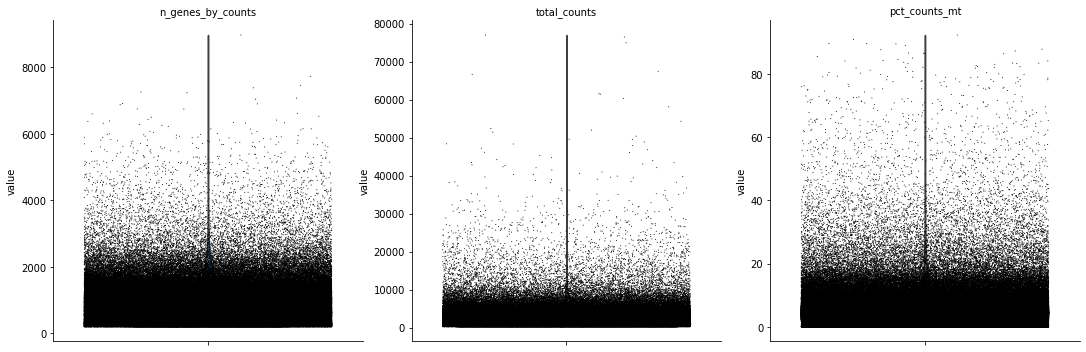

In [59]:
# violin plot of the computed quality measures.
sc.pl.violin(adata_concat, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter = 0.4, multi_panel = True)

In [60]:
#Filter
adata_concat = adata_concat[adata_concat.obs.n_genes_by_counts < 2500, :]
adata_concat = adata_concat[adata_concat.obs.pct_counts_mt < 15, :]
adata_concat

View of AnnData object with n_obs × n_vars = 460072 × 25675
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'doublet_score', 'predicted_doublet', 'Sampleid', 'Patient', 'Sampletype', 'Age_group', 'Gender', 'Cohort', 'Diseasetype', 'Batch', 'Study', 'Nasal_inflammation', 'COVID_severity', 'sampleid', 'soup_correction', 'scrublet_score', 'n_genes', 'percent_mito', 'n_counts', 'is_doublet', 'filter_rna', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

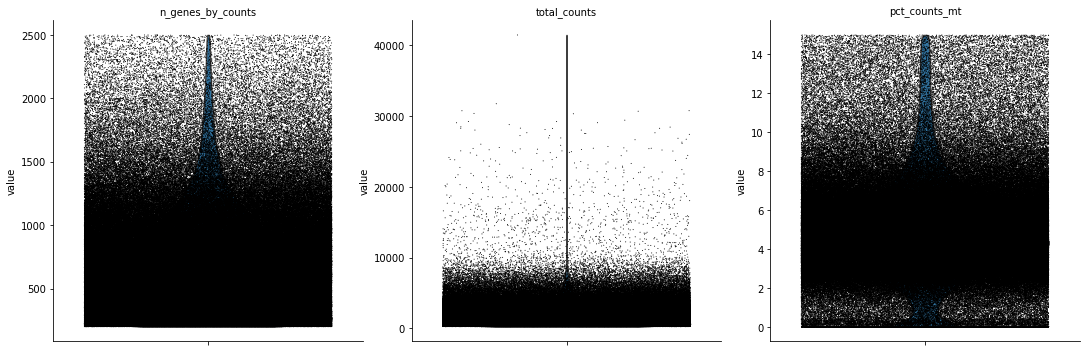

In [61]:
# violin plot of the computed quality measures.
sc.pl.violin(adata_concat, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter = 0.4, multi_panel = True)

In [40]:
# Remove the bad quality cells and continue
#adata = adata[adata.obs['filter_rna'] != "True"]
#adata
#Not done as filtered already as above

In [62]:
# How many doublets did scrublet pick up?
adata_concat.obs['predicted_doublet'].value_counts()

False    411190
True       2206
Name: predicted_doublet, dtype: int64

In [63]:
# How many doublets did scrublet pick up?
adata_concat.obs['is_doublet'].value_counts()

False    45249
True      1427
Name: is_doublet, dtype: int64

In [64]:
#save unnormalised data
adata_concat.write('COVID_combined_trans/out/COVID_ctrl_raw__filtered_nolognorm_250621.h5ad')

In [3]:
#reload data as kernel died in normalising step
adata_concat = sc.read_h5ad('COVID_combined_trans/out/COVID_ctrl_raw__filtered_nolognorm_250621.h5ad')
adata_concat

AnnData object with n_obs × n_vars = 460072 × 25675
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'doublet_score', 'predicted_doublet', 'Sampleid', 'Patient', 'Sampletype', 'Age_group', 'Gender', 'Cohort', 'Diseasetype', 'Batch', 'Study', 'Nasal_inflammation', 'COVID_severity', 'sampleid', 'soup_correction', 'scrublet_score', 'n_genes', 'percent_mito', 'n_counts', 'is_doublet', 'filter_rna', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [4]:
# normalize to 10000 counts per cell
sc.pp.normalize_total(adata_concat, target_sum = 1e4)


In [5]:
#Write out normalised data before log1p step
adata_concat.write('COVID_combined_trans/out/COVID_ctrl_raw_filtered_norm_nolog_250621.h5ad')

... storing 'predicted_doublet' as categorical
... storing 'Batch' as categorical
... storing 'filter_rna' as categorical


In [6]:
#lognormalise
sc.pp.log1p(adata_concat)

In [7]:
#Write out lognormalised data
adata_concat.write('COVID_combined_trans/out/COVID_ctrl_raw_filtered_lognorm_250621.h5ad')

In [8]:
# create a separate object to hold the raw counts and stash normalised data
adata_concat.raw = adata_concat
adata_concat_raw = adata_concat.copy()
# also do this
adata_concat.layers["counts"] = adata_concat.X.copy()
adata_concat_raw.layers["counts"] = adata_concat_raw.X.copy()

In [9]:
adata_concat.raw

In [10]:
adata_concat

AnnData object with n_obs × n_vars = 460072 × 25675
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'doublet_score', 'predicted_doublet', 'Sampleid', 'Patient', 'Sampletype', 'Age_group', 'Gender', 'Cohort', 'Diseasetype', 'Batch', 'Study', 'Nasal_inflammation', 'COVID_severity', 'sampleid', 'soup_correction', 'scrublet_score', 'n_genes', 'percent_mito', 'n_counts', 'is_doublet', 'filter_rna', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p'
    layers: 'counts'

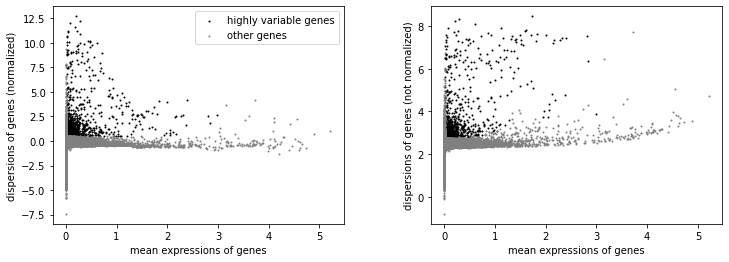

In [11]:
# Identify highly-variable genes
sc.pp.highly_variable_genes(adata_concat, min_mean = 0.0125, max_mean = 3, min_disp = 0.5)
# plot highly_variable_genes
sc.pl.highly_variable_genes(adata_concat)

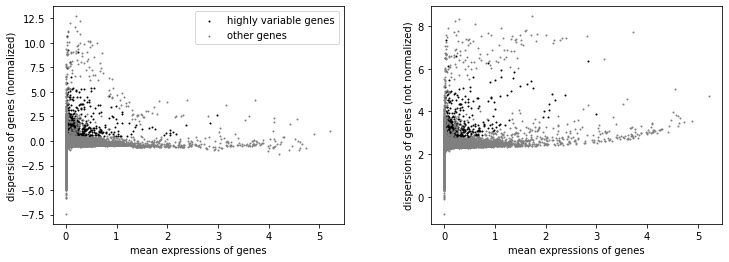

In [12]:
## remove TRBV/TRAV/TRGV/TRDV and IGHV/IGLV/IGKV from the highly variable genes
import re
for i in adata_concat.var.index:
    if re.search('^TR[ABGD]V|^IG[HKL]V', i):
        adata_concat.var.at[i, 'highly_variable'] = False
sc.pl.highly_variable_genes(adata_concat)

In [13]:
# filter to only highly variable
adata_concat = adata_concat[:, adata_concat.var['highly_variable']]
adata_concat

View of AnnData object with n_obs × n_vars = 460072 × 1321
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'doublet_score', 'predicted_doublet', 'Sampleid', 'Patient', 'Sampletype', 'Age_group', 'Gender', 'Cohort', 'Diseasetype', 'Batch', 'Study', 'Nasal_inflammation', 'COVID_severity', 'sampleid', 'soup_correction', 'scrublet_score', 'n_genes', 'percent_mito', 'n_counts', 'is_doublet', 'filter_rna', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    layers: 'counts'

In [16]:
#Assign 'cellbender_cell' for latent_cell_probability >0.5
adata_concat.obs['cellbender_cell'] = adata_concat.obs['latent_cell_probability']>0.5
adata_concat

Trying to set attribute `.obs` of view, copying.


AnnData object with n_obs × n_vars = 460072 × 1321
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'doublet_score', 'predicted_doublet', 'Sampleid', 'Patient', 'Sampletype', 'Age_group', 'Gender', 'Cohort', 'Diseasetype', 'Batch', 'Study', 'Nasal_inflammation', 'COVID_severity', 'sampleid', 'soup_correction', 'scrublet_score', 'n_genes', 'percent_mito', 'n_counts', 'is_doublet', 'filter_rna', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'cellbender_cell'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    layers: 'counts'

In [18]:
adata_concat.obs['cellbender_cell'].value_counts()

True     413382
False     46690
Name: cellbender_cell, dtype: int64

In [20]:
adata_concat.obs['is_doublet'].value_counts()

False    45249
True      1427
Name: is_doublet, dtype: int64

In [53]:
#Filter to remove cellbender assessed unlikely cells 
#adata = adata[adata.obs.cellbender_cell == True, :]
#adata
#Not done as already removed by other steps

View of AnnData object with n_obs × n_vars = 392383 × 1209
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'doublet_score', 'predicted_doublet', 'sampleid', 'patient', 'sampletype', 'age_group', 'gender', 'cohort', 'sub_cohort', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'cellbender_cell'
    var: 'feature_type', 'genome', 'id', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    obsm: 'latent_gene_encoding'
    layers: 'cellranger', 'cellbender', 'counts'

In [54]:
#adata.obs['cellbender_cell'].value_counts()

True    392383
Name: cellbender_cell, dtype: int64

In [21]:
import multiprocessing
# regress and scale for PCA
sc.pp.regress_out(adata_concat, ['total_counts', 'pct_counts_mt'])


In [ ]:
sc.pp.scale(adata_concat, max_value = 10)


In [ ]:
# Principal component analysis
sc.tl.pca(adata_concat, svd_solver = 'arpack')
sc.pl.pca_variance_ratio(adata_concat, log = True, n_pcs = 50)

In [ ]:
# Computing the neighborhood graph. Seurat uses k = 20 as default
sc.pp.neighbors(adata, n_neighbors = 10, n_pcs = 50)
# run UMAP
sc.tl.umap(adata, n_components = 2, min_dist = 0.3)
sc.pl.umap(adata, color=['sampleid','patient', 'sampletype'])

In [ ]:
# run BBKNN
sc.external.pp.bbknn(adata, batch_key = 'patient', neighbors_within_batch=10)
# UMAP
sc.tl.umap(adata, n_components = 2, min_dist = 0.3)
sc.pl.umap(adata, color=['sampleid','patient', 'sampletype'])

In [ ]:
# find clusters
sc.tl.leiden(adata, resolution =0.5)


In [ ]:
#Plot
sc.pl.umap(adata, color=['sampleid','patient', 'sampletype', 'gender', 'leiden', 'predicted_doublet'], ncols = 3)

In [ ]:
# create a palette for umap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
grey = np.array([215/256, 215/256, 215/256, 1])
newcolors[:1, :] = grey
newcmp = ListedColormap(newcolors)

In [ ]:
# run marker gene test
sc.tl.rank_genes_groups(adata, groupby = 'leiden', method = 'wilcoxon', n_genes = 30000)

In [ ]:
#Plot marker genes in dotplot
sc.pl.rank_genes_groups_dotplot(adata, n_genes = 10, standard_scale = 'var', color_map = 'viridis')

In [54]:
#Write out
adata.write('COVID_combined_trans/out/cov_combined_pp.h5ad', compression = 'gzip')
adata.raw.to_adata().write('COVID_combined_trans/out/cov_combined_pp_raw.h5ad')